In [1]:
class GridWorld:
    def __init__(self, grid, goal_state, obstacle_states, start_state=(0, 0)):
        self.grid = grid
        self.grid_height = len(grid)
        self.grid_width = len(grid[0])
        self.goal_state = goal_state
        self.obstacle_states = obstacle_states
        self.start_state = start_state
        self.current_state = start_state
        self.actions = ['up', 'down', 'left', 'right']
        self.rewards = {'goal': 10, 'obstacle': -10, 'step': -1}

    def is_terminal_state(self, state):
        return state == self.goal_state or state in self.obstacle_states

    def get_next_state_and_reward(self, state, action):
        if self.is_terminal_state(state):
            return state, 0

        row, col = state
        next_row, next_col = row, col

        if action == 'up':
            next_row -= 1
        elif action == 'down':
            next_row += 1
        elif action == 'left':
            next_col -= 1
        elif action == 'right':
            next_col += 1

        # Check for boundaries
        if not (0 <= next_row < self.grid_height and 0 <= next_col < self.grid_width):
            return state, self.rewards['obstacle']

        next_state = (next_row, next_col)

        if next_state == self.goal_state:
            return next_state, self.rewards['goal']
        elif next_state in self.obstacle_states:
            return state, self.rewards['obstacle']
        else:
            return next_state, self.rewards['step']

    def reset(self):
        self.current_state = self.start_state
        return self.current_state

    def step(self, action):
        next_state, reward = self.get_next_state_and_reward(self.current_state, action)
        self.current_state = next_state
        done = self.is_terminal_state(self.current_state)
        return self.current_state, reward, done

grid = [
    [0, 0, -1, 0, 0],
    [0, -1, 0, -1, 0],
    [0, 0, 0, 0, -1],
    [-1, 0, -1, 0, 0],
    [0, 0, 0, -1, 1]
]

goal_state = (4, 4)
obstacle_states = [(0, 2), (1, 1), (1, 3), (2, 4), (3, 0), (3, 2), (4, 3)]
start_state = (0, 0)

env = GridWorld(grid, goal_state, obstacle_states, start_state)

print("Grid World Initialized (5x5):")
for i, row in enumerate(env.grid):
    print(f"Row {i}: {row}")
print(f"Goal State: {env.goal_state}")
print(f"Obstacle States: {env.obstacle_states}")
print(f"Start State: {env.start_state}")
print(f"Actions: {env.actions}")
print(f"Rewards: {env.rewards}")

print("\nVisual Grid Representation:")
print("S = Start, G = Goal, X = Obstacle, . = Empty")
for i in range(env.grid_height):
    row_str = ""
    for j in range(env.grid_width):
        if (i, j) == start_state:
            row_str += "S "
        elif (i, j) == goal_state:
            row_str += "G "
        elif (i, j) in obstacle_states:
            row_str += "X "
        else:
            row_str += ". "
    print(row_str)

Grid World Initialized (5x5):
Row 0: [0, 0, -1, 0, 0]
Row 1: [0, -1, 0, -1, 0]
Row 2: [0, 0, 0, 0, -1]
Row 3: [-1, 0, -1, 0, 0]
Row 4: [0, 0, 0, -1, 1]
Goal State: (4, 4)
Obstacle States: [(0, 2), (1, 1), (1, 3), (2, 4), (3, 0), (3, 2), (4, 3)]
Start State: (0, 0)
Actions: ['up', 'down', 'left', 'right']
Rewards: {'goal': 10, 'obstacle': -10, 'step': -1}

Visual Grid Representation:
S = Start, G = Goal, X = Obstacle, . = Empty
S . X . . 
. X . X . 
. . . . X 
X . X . . 
. . . X G 


In [2]:
q_table = {}
for row in range(env.grid_height):
    for col in range(env.grid_width):
        state = (row, col)
        q_table[state] = {action: 0 for action in env.actions}

print("Initialized Q-table:")
for state, actions in q_table.items():
    print(f"{state}: {actions}")

Initialized Q-table:
(0, 0): {'up': 0, 'down': 0, 'left': 0, 'right': 0}
(0, 1): {'up': 0, 'down': 0, 'left': 0, 'right': 0}
(0, 2): {'up': 0, 'down': 0, 'left': 0, 'right': 0}
(0, 3): {'up': 0, 'down': 0, 'left': 0, 'right': 0}
(0, 4): {'up': 0, 'down': 0, 'left': 0, 'right': 0}
(1, 0): {'up': 0, 'down': 0, 'left': 0, 'right': 0}
(1, 1): {'up': 0, 'down': 0, 'left': 0, 'right': 0}
(1, 2): {'up': 0, 'down': 0, 'left': 0, 'right': 0}
(1, 3): {'up': 0, 'down': 0, 'left': 0, 'right': 0}
(1, 4): {'up': 0, 'down': 0, 'left': 0, 'right': 0}
(2, 0): {'up': 0, 'down': 0, 'left': 0, 'right': 0}
(2, 1): {'up': 0, 'down': 0, 'left': 0, 'right': 0}
(2, 2): {'up': 0, 'down': 0, 'left': 0, 'right': 0}
(2, 3): {'up': 0, 'down': 0, 'left': 0, 'right': 0}
(2, 4): {'up': 0, 'down': 0, 'left': 0, 'right': 0}
(3, 0): {'up': 0, 'down': 0, 'left': 0, 'right': 0}
(3, 1): {'up': 0, 'down': 0, 'left': 0, 'right': 0}
(3, 2): {'up': 0, 'down': 0, 'left': 0, 'right': 0}
(3, 3): {'up': 0, 'down': 0, 'left': 0, 'ri

In [3]:
import random

# Set hyperparameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 1.0  # Exploration rate
num_episodes = 1000
epsilon_decay_rate = 0.995

# Start training loop
for episode in range(num_episodes):
    state = env.reset()  # Reset environment to the starting state
    done = False  # Initialize done flag

    # Inner loop for an episode
    while not done:
        # Epsilon-greedy policy
        if random.uniform(0, 1) < epsilon:
            action = random.choice(env.actions)  # Explore: Choose a random action
        else:
            # Exploit: Choose the action with the highest Q-value for the current state
            action = max(q_table[state], key=q_table[state].get)

        # Take the chosen action in the environment
        next_state, reward, done = env.step(action)

        # Update the Q-value for the current state and action
        old_value = q_table[state][action]
        if done:
            next_max_q = 0  # If the next state is terminal, the max Q-value is 0
        else:
            next_max_q = max(q_table[next_state].values())

        new_value = old_value + alpha * (reward + gamma * next_max_q - old_value)
        q_table[state][action] = new_value

        # Update the current state
        state = next_state

    # Decay epsilon after the episode
    epsilon *= epsilon_decay_rate

    # Optionally, print progress
    if episode % 100 == 0:
        print(f"Episode {episode}/{num_episodes}")

print("\nTraining finished.")

Episode 0/1000
Episode 100/1000
Episode 200/1000
Episode 300/1000
Episode 400/1000
Episode 500/1000
Episode 600/1000
Episode 700/1000
Episode 800/1000
Episode 900/1000

Training finished.


Episode 0/1000
Episode 100/1000
Episode 200/1000
Episode 300/1000
Episode 400/1000
Episode 500/1000
Episode 600/1000
Episode 700/1000
Episode 800/1000
Episode 900/1000

Training finished.


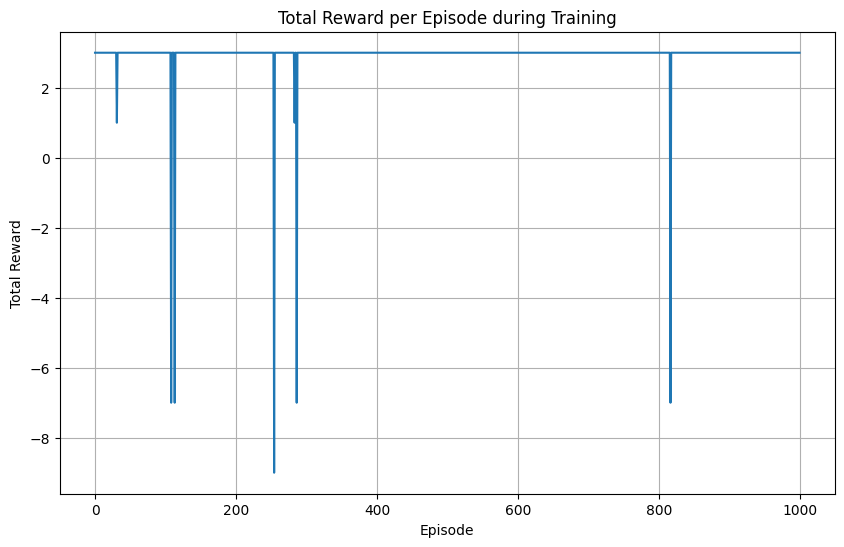

In [4]:
import matplotlib.pyplot as plt

# List to store total reward per episode
episode_rewards = []

# Start training loop
for episode in range(num_episodes):
    state = env.reset()  # Reset environment to the starting state
    done = False  # Initialize done flag
    total_reward = 0 # Initialize total reward for the episode

    # Inner loop for an episode
    while not done:
        # Epsilon-greedy policy
        if random.uniform(0, 1) < epsilon:
            action = random.choice(env.actions)  # Explore: Choose a random action
        else:
            # Exploit: Choose the action with the highest Q-value for the current state
            action = max(q_table[state], key=q_table[state].get)

        # Take the chosen action in the environment
        next_state, reward, done = env.step(action)

        # Update the Q-value for the current state and action
        old_value = q_table[state][action]
        if done:
            next_max_q = 0  # If the next state is terminal, the max Q-value is 0
        else:
            next_max_q = max(q_table[next_state].values())

        new_value = old_value + alpha * (reward + gamma * next_max_q - old_value)
        q_table[state][action] = new_value

        # Update the current state and total reward
        state = next_state
        total_reward += reward

    # Append total reward for the episode
    episode_rewards.append(total_reward)

    # Decay epsilon after the episode
    epsilon *= epsilon_decay_rate

    # Optionally, print progress
    if episode % 100 == 0:
        print(f"Episode {episode}/{num_episodes}")

print("\nTraining finished.")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(range(num_episodes), episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode during Training')
plt.grid(True)
plt.show()

In [5]:
# Visualize the learned policy
policy_grid = [[' ' for _ in range(env.grid_width)] for _ in range(env.grid_height)]

# Define symbols for actions and terminal states
action_symbols = {'up': '^', 'down': 'v', 'left': '<', 'right': '>'}
goal_symbol = 'G'
obstacle_symbol = 'X'

for row in range(env.grid_height):
    for col in range(env.grid_width):
        state = (row, col)
        if state == env.goal_state:
            policy_grid[row][col] = goal_symbol
        elif state in env.obstacle_states:
            policy_grid[row][col] = obstacle_symbol
        else:
            # Determine the optimal action for non-terminal states
            if state in q_table:
                # Find the action with the maximum Q-value
                optimal_action = max(q_table[state], key=q_table[state].get)
                policy_grid[row][col] = action_symbols.get(optimal_action, '?') # Use '?' if action is not in symbols
            else:
                policy_grid[row][col] = '?' # Mark states not in q_table

# Print the policy grid
print("\nLearned Policy:")
for row in policy_grid:
    print(' '.join(row))


Learned Policy:
v < X ^ ^
v X v X ^
> > > v X
X ^ X > v
> ^ < X G


## Summary

The grid world environment was successfully initialized with a goal state at (4, 4) and obstacle states at (0, 2), (1, 1), (1, 3), (2, 4), (3, 0), (3, 2), and (4, 3).
A Q-table was created and initialized with zero values for all state-action pairs in the grid.
The Q-learning algorithm was implemented and trained for 1000 episodes using an epsilon-greedy policy with a learning rate ( α ) of 0.1, a discount factor ( γ ) of 0.9, and an epsilon decay rate of 0.995.
The total reward per episode was tracked and plotted, showing the agent's learning progress over the training episodes.
The learned policy was visualized as a grid, displaying the optimal action (represented by arrows) for each non-terminal state and marking the terminal states (Goal 'G' and Obstacle 'X').